### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore', category=FutureWarning)

path = '../../data/'
df = pd.read_csv(path + 'marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [526]:
df.info(), df.select_dtypes(include='object').nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(None,
 Education           5
 Marital_Status      8
 Dt_Customer       663
 dtype: int64)

In [527]:
df.isna().sum() 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# Висновки 1

- Дані містять 2240 записів та 29 колонок
- Пропущені значення тільки в Income (24 записи)

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

(count      2216.000000
 mean      52247.251354
 std       25173.076661
 min        1730.000000
 25%       35303.000000
 50%       51381.500000
 75%       68522.000000
 max      666666.000000
 Name: Income, dtype: float64,
 <Axes: >)

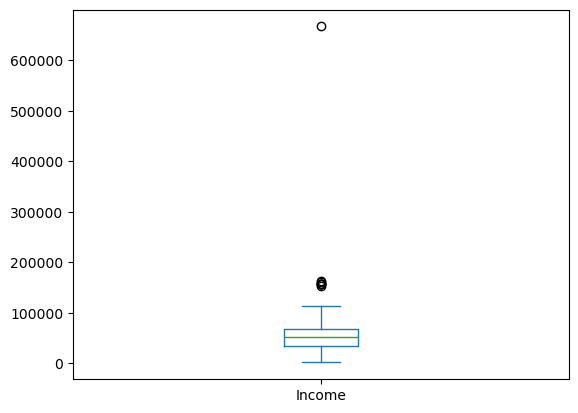

In [528]:
df.Income.describe(), df.Income.plot(kind = "box")

In [529]:
df['Income_nan_flag'] = df['Income'].isna().astype(int)
df['Income'].fillna(0, inplace=True)

# Висновки 2

МИ не знаємо причини пропусків в даних ,тому заповнемо всі пропуски 0 (т.я 0 в нас ніколи не зустрічався). Якщо відсутність записів спричинена певною специфікою кліента, то в нас буде змога побачити це. Також додатково створимо зміну з флагом (Income_nan_flag) яка  показувала чи було значення заповнене вручну

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

(Register_month
 8     222
 5     216
 10    212
 3     211
 1     197
 9     193
 11    187
 4     182
 2     178
 12    175
 6     166
 7     101
 Name: count, dtype: int64,
 count    2240.000000
 mean      353.582143
 std       202.122512
 min         0.000000
 25%       180.750000
 50%       355.500000
 75%       529.000000
 max       699.000000
 Name: Days_Customer, dtype: float64,
 <Axes: >)

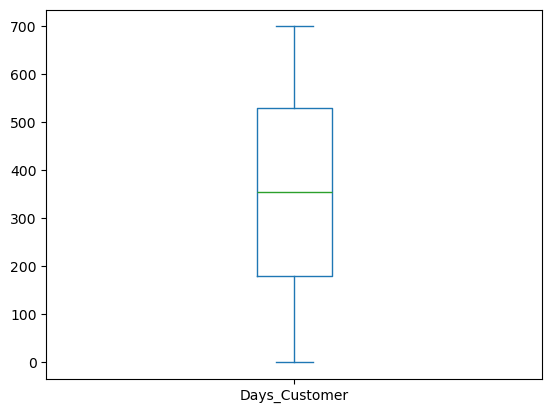

In [530]:
# how many days client has been a customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Days_Customer'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['Register_month'] = df['Dt_Customer'].dt.month

df['Register_month'].value_counts(), df['Days_Customer'].describe(), df['Days_Customer'].plot(kind = "box")

(       Age_by_today  Age_by_registration
 count   2240.000000          2240.000000
 mean      45.194196            44.222321
 std       11.984069            12.022855
 min       18.000000            16.000000
 25%       37.000000            36.000000
 50%       44.000000            43.000000
 75%       55.000000            54.000000
 max      121.000000           121.000000,
 <Axes: >)

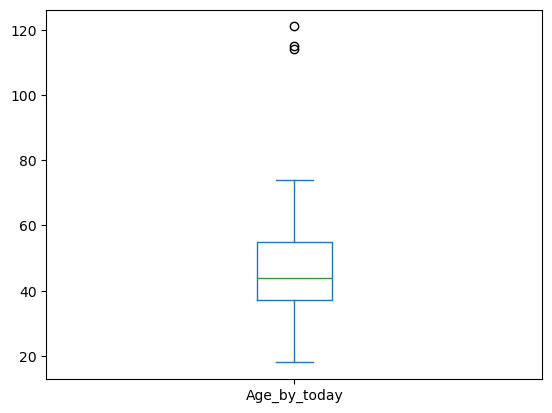

In [531]:
# how old the client based on Year Birth
today_year = df['Dt_Customer'].dt.year.max()
df['Age_by_today'] = (today_year - df['Year_Birth'])

# age by the registration day
df['Age_by_registration'] = df['Dt_Customer'].dt.year - df['Year_Birth']

df[['Age_by_today','Age_by_registration']].describe(), df['Age_by_today'].plot(kind = "box")

In [532]:
old_clients = df[df['Age_by_today'] > 100]
print(old_clients[['ID', 'Dt_Customer', 'Year_Birth','Age_by_registration', 'Age_by_today']].head(5))

        ID Dt_Customer  Year_Birth  Age_by_registration  Age_by_today
192   7829  2013-09-26        1900                  113           114
239  11004  2014-05-17        1893                  121           121
339   1150  2013-09-26        1899                  114           115


In [533]:
df['Education'].value_counts(), df['Marital_Status'].value_counts(), 

(Education
 Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: count, dtype: int64,
 Marital_Status
 Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: count, dtype: int64)

In [534]:
from sklearn.preprocessing import OneHotEncoder

maper = {'YOLO': 'Other', 'Absurd': 'Other', 'Alone': 'Single'}
df['Marital_Status'] = df['Marital_Status'].replace(maper)

ohe = OneHotEncoder(sparse_output=False)

ohe.fit(df[['Education', 'Marital_Status']])
ohe.categories_
ohe_df = pd.DataFrame(ohe.transform(df[['Education', 'Marital_Status']]), columns=ohe.get_feature_names_out(['Education', 'Marital_Status']))
ohe_df.head()

df = pd.concat([df, ohe_df], axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Education                2240 non-null   object        
 3   Marital_Status           2240 non-null   object        
 4   Income                   2240 non-null   float64       
 5   Kidhome                  2240 non-null   int64         
 6   Teenhome                 2240 non-null   int64         
 7   Dt_Customer              2240 non-null   datetime64[ns]
 8   Recency                  2240 non-null   int64         
 9   MntWines                 2240 non-null   int64         
 10  MntFruits                2240 non-null   int64         
 11  MntMeatProducts          2240 non-null   int64         
 12  MntFishProducts          2240 non-

# Висновки 3

- Dt_Customer - має зачення коли кліент зареєструвався
    - порахуємо скількі днів клієнт є нашим користувачем. Від поточної дати, яка представлена як найбільша дата реєстрації (бо ми ми не можемо використати поточну дату як сьогоді та нам невідомо в коли ці дані стали для нас доступні) віднемемо дату реєстрації клієнта
    - також додатково створимо змінну в який місяць приєднався клієнт до нас.

- Year_Birth - день народження кліента
    - Порахуємо поточний вік клієнт та скільки йому було років на момент реєстравції 
    - маємо декілька викидів де клієнту 100+ років    

- Education 
    - Застосуємо OneHotEncoder для того аби створити додаткові колонки з кожним типом освіти

- Marital_Status       
     - Маємо два невідоми статуси YOLO та Absurd, які занесемо в категорію Other
     - Категорії Alone та Single звучать однаково - тому об'єднаємо їх разом
     - Застосуємо OneHotEncoder для розбиття колонки на окремі колонки

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [536]:
X = df.drop(columns=['ID', 'Dt_Customer', 'Year_Birth', 'Education', 'Marital_Status'])

In [537]:
# create df to save oss silhouette score into une df
df_metrics = pd.DataFrame(columns=['model', 'value'])

In [538]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def k_mean_clustering(X, n_clusters, type='kmeans'): 

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    pred = kmeans.predict(X)
    metric = silhouette_score(X, pred)
    print(f'Silhouette score for {n_clusters} clusters: {metric:.4f}')

    new_row = pd.DataFrame({'model': [type], 'value': [metric]})

    return kmeans.labels_, new_row

In [ ]:
kmeans_labels_3, metric_3 = k_mean_clustering(X, 3, '3 clusters')
df_metrics = pd.concat([df_metrics, metric_3], ignore_index=True)
df_metrics

Silhouette score for 3 clusters: 0.5282


,model,value
0,3 clusters,0.528192


# Висновки 4

- Для 3 кластерів отримали доволі непогану метрику Силуету = 0.597, що можна трактувати розподіл даних в кластерах має сенс та вони наближенні одне до одного

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [540]:
import plotly.express as px

px.scatter_3d(df, x='Income', y='NumWebPurchases', z='Days_Customer', color=kmeans_labels_3, title='3 Clusters KMeans', color_continuous_scale=px.colors.sequential.Viridis).show()

In [541]:
df[df.Income<600000].Income.describe(), df[df.NumWebPurchases<20].NumWebPurchases.describe()

(count      2239.000000
 mean      51412.792765
 std       22069.582225
 min           0.000000
 25%       34716.000000
 50%       51039.000000
 75%       68277.500000
 max      162397.000000
 Name: Income, dtype: float64,
 count    2236.000000
 mean        4.046512
 std         2.628289
 min         0.000000
 25%         2.000000
 50%         4.000000
 75%         6.000000
 max        11.000000
 Name: NumWebPurchases, dtype: float64)

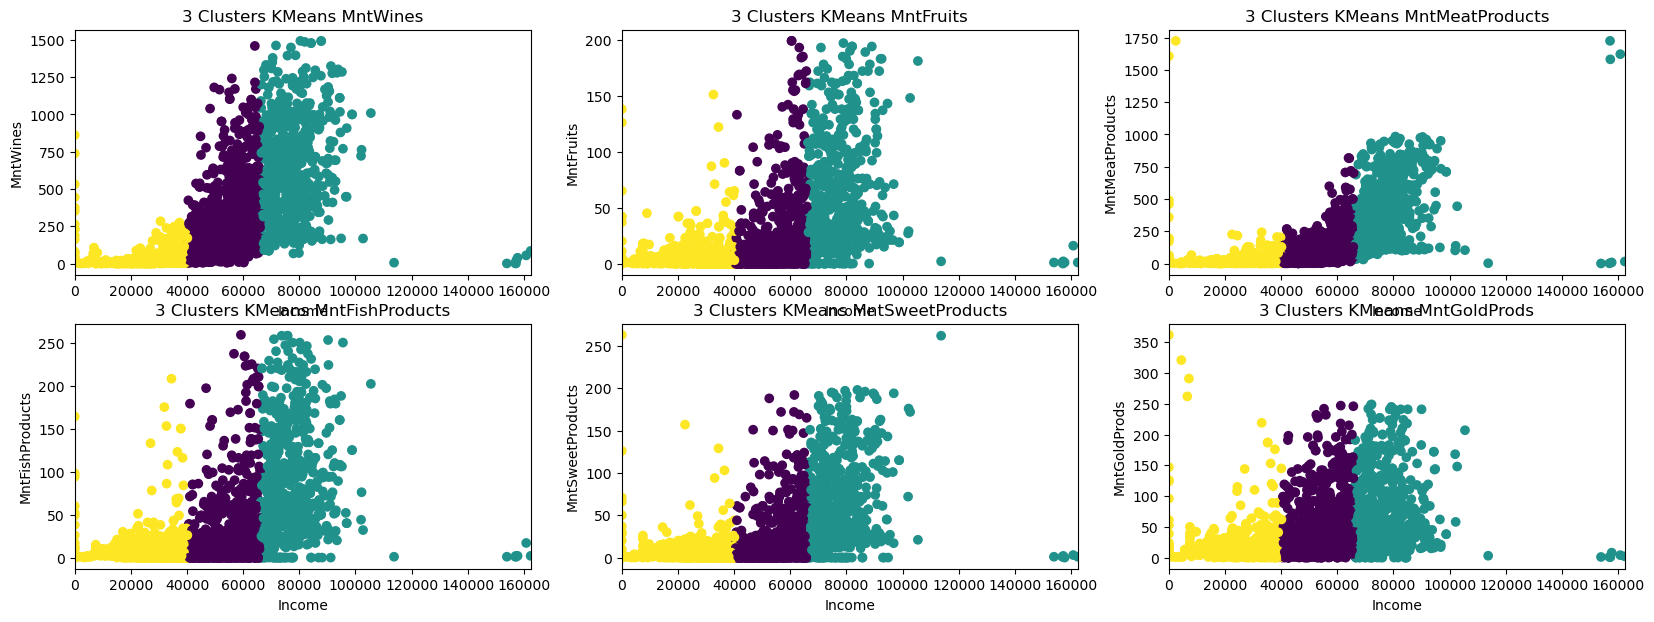

In [542]:
plt.figure(figsize=(20, 7))
col =['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

for i in col:
    plt.subplot(2, 3, col.index(i)+1)
    plt.scatter(df['Income'], df[i], c=kmeans_labels_3, cmap='viridis')
    plt.title(f'3 Clusters KMeans {i}')
    plt.xlim(0, 162397)
    plt.xlabel('Income')
    plt.ylabel(i)

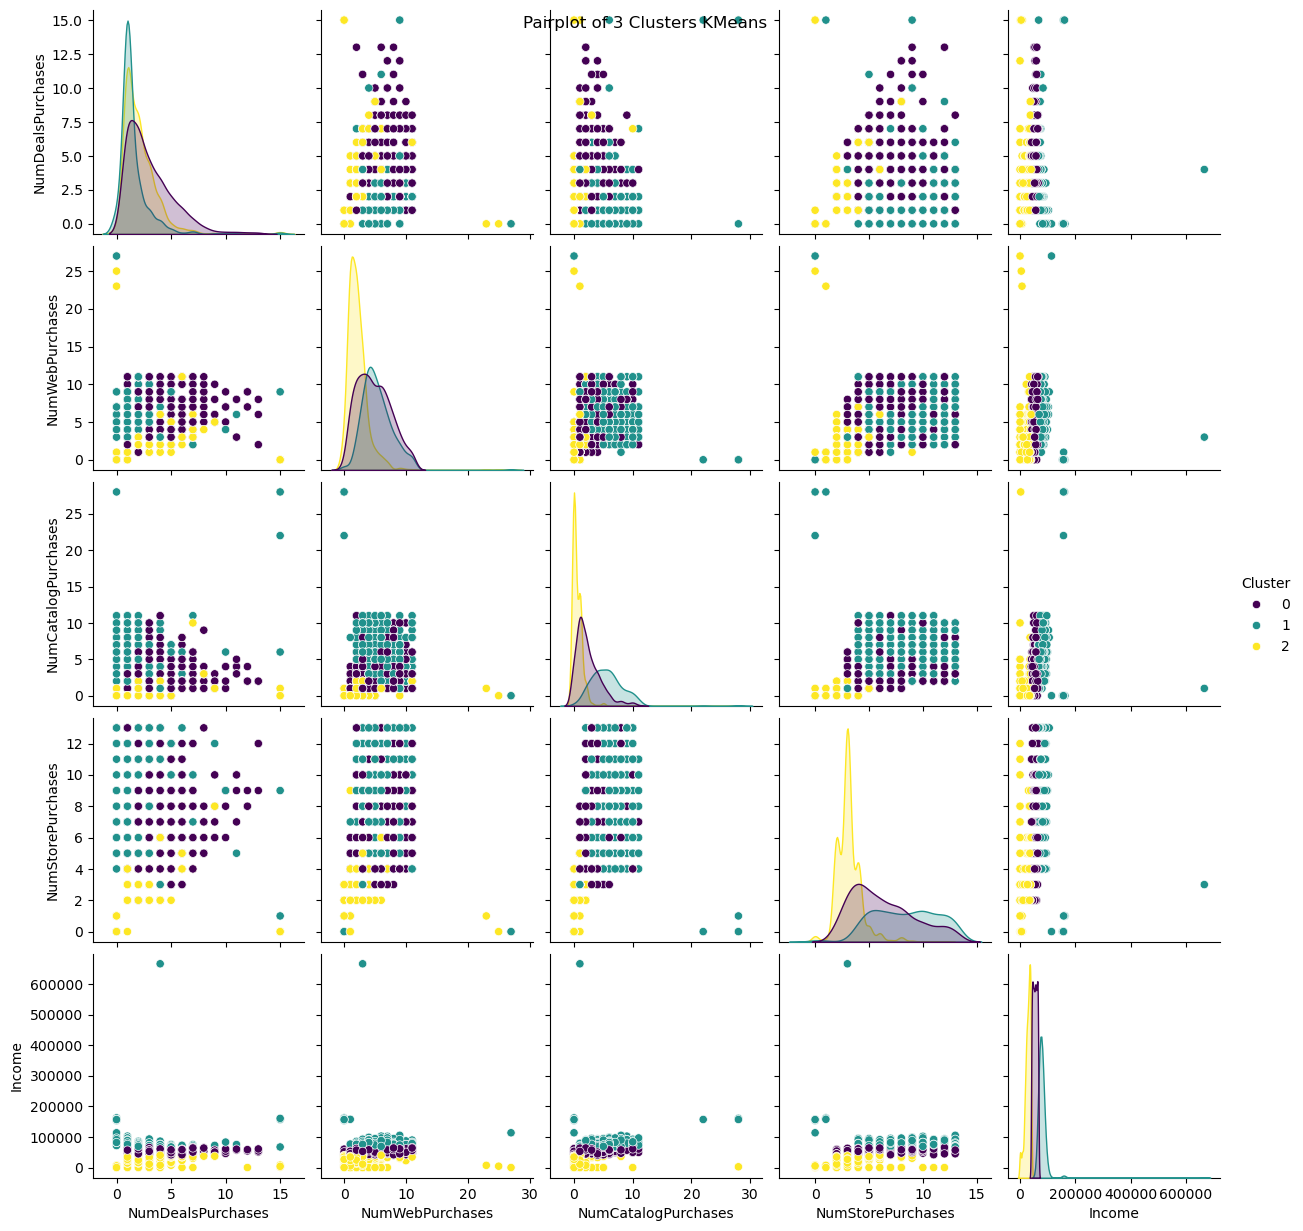

In [543]:
def pairplot_clusters(X, labels, selected_features, title):
    X_show = X.copy()
    X_show['Cluster'] = labels
    sns.pairplot(X_show[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
    plt.suptitle(title)
    plt.show()

pairplot_clusters(X, kmeans_labels_3, ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'Income'], 'Pairplot of 3 Clusters KMeans')    

# Висновки 5

- Бачимо певні викиди в даних, але в цілому на 3Д скатерплоті видно розділення на три кластери по доходах
- Якщо обрізати доходи аби викиди не відображалися, то жовта категорія дуже гарно відділяється в кластер людей з нижчим доходом та тих хто витрачає менші суми на покупки (по всім категоріям). При тому помітно що в зееного кластеру вищі доходи  і певні люди з кластеру більше витрачають на покупки, але границя між фіолетовим та зеленим на око складно визначається
- На графіках попарних порівнянь так само жовта група переважно опиняється в нижньому лівому куті. Часто кластери дуже змішані між собою. 


**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [544]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled, metric_scaled = k_mean_clustering(X_scaled, 3, 'StandartScaler')
df_metrics = pd.concat([df_metrics, metric_scaled], ignore_index=True)


minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)
kmeans_minmax, metric_minmax = k_mean_clustering(X_minmax, 3, 'MinMaxScaler')
df_metrics = pd.concat([df_metrics, metric_minmax], ignore_index=True)

Silhouette score for 3 clusters: 0.0974
Silhouette score for 3 clusters: 0.1705


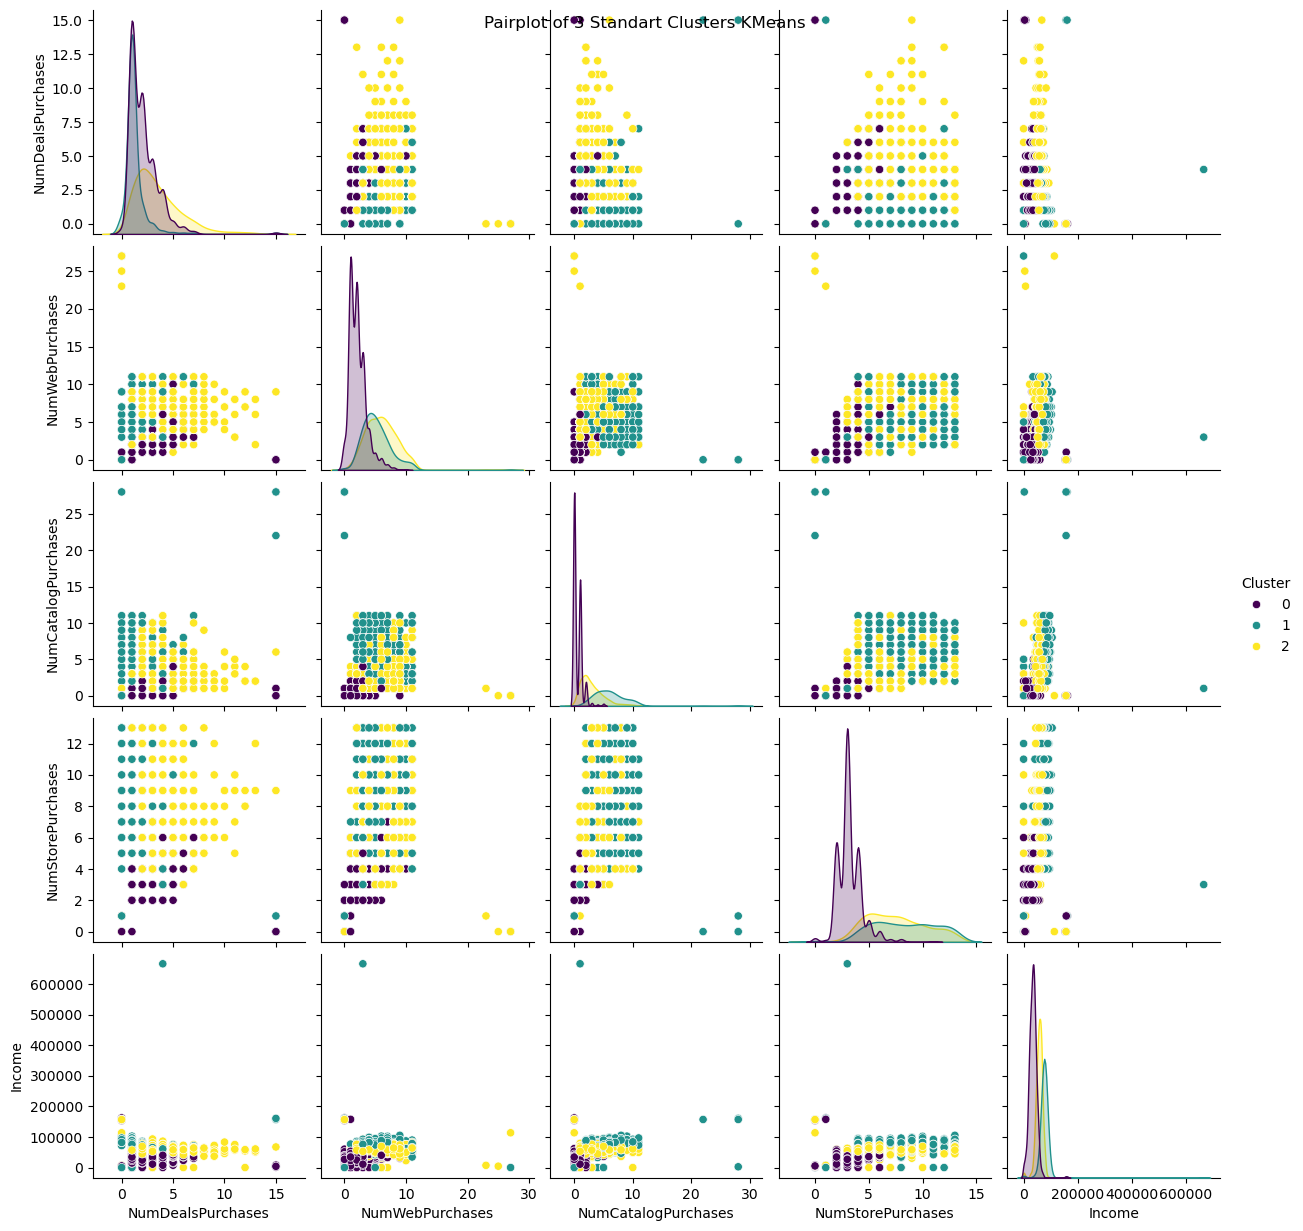

In [545]:
pairplot_clusters(X, kmeans_scaled, ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'Income'], 'Pairplot of 3 Standart Clusters KMeans')    

# Висновки 6

- При масштабувані даних метрика силуєту дуже сильно впала та наблизилася до 0, що є поганим показником
- Візуалізації виглядають доволі схоже

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [569]:
X_clean = X.drop(df[df['Income'] > 600000].index)
X_clean = X_clean.drop(X_clean[X_clean['NumWebPurchases'] > 20].index)
X_clean = X_clean.drop(X_clean[X_clean['NumCatalogPurchases'] > 20].index)
# X_clean = X_clean.drop(X_clean[X_clean['NumWebPurchases'] > 20].index)
X_clean = X_clean.drop(X_clean[X_clean['Age_by_today'] > 100].index)
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2228 non-null   float64
 1   Kidhome                  2228 non-null   int64  
 2   Teenhome                 2228 non-null   int64  
 3   Recency                  2228 non-null   int64  
 4   MntWines                 2228 non-null   int64  
 5   MntFruits                2228 non-null   int64  
 6   MntMeatProducts          2228 non-null   int64  
 7   MntFishProducts          2228 non-null   int64  
 8   MntSweetProducts         2228 non-null   int64  
 9   MntGoldProds             2228 non-null   int64  
 10  NumDealsPurchases        2228 non-null   int64  
 11  NumWebPurchases          2228 non-null   int64  
 12  NumCatalogPurchases      2228 non-null   int64  
 13  NumStorePurchases        2228 non-null   int64  
 14  NumWebVisitsMonth        2228

# Висновки 7

- Видалимо викиди, бо їх мало та це не має вплинути на дані.
- Будемо вважати викидами
    - Дохід більший за 600 000
    - К-ть покупок (NumCatalogPurchases та NumWebPurchases) більша 20
    - Вік клієнтів старше 100



**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

Text(0.5, 1.0, 'Elbow Method')

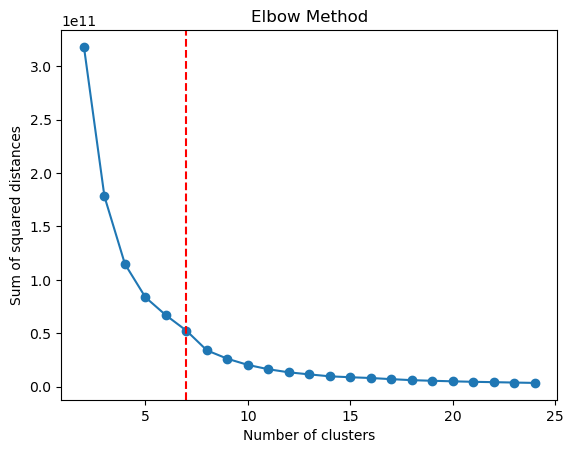

In [547]:
K_point = range(2, 25)
SSD = []

for k in K_point:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clean)
    SSD.append(kmeans.inertia_)

plt.plot(K_point, SSD, marker='o')
plt.axvline(x=7, color='red', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')  

In [548]:
kmeans_labels_6, metric_6 = k_mean_clustering(X_clean, 7, '7 clusters')
df_metrics = pd.concat([df_metrics, metric_6], ignore_index=True)
df_metrics


Silhouette score for 7 clusters: 0.5240


,model,value
0,3 clusters,0.528192
1,StandartScaler,0.097405
2,MinMaxScaler,0.170471
3,7 clusters,0.524035


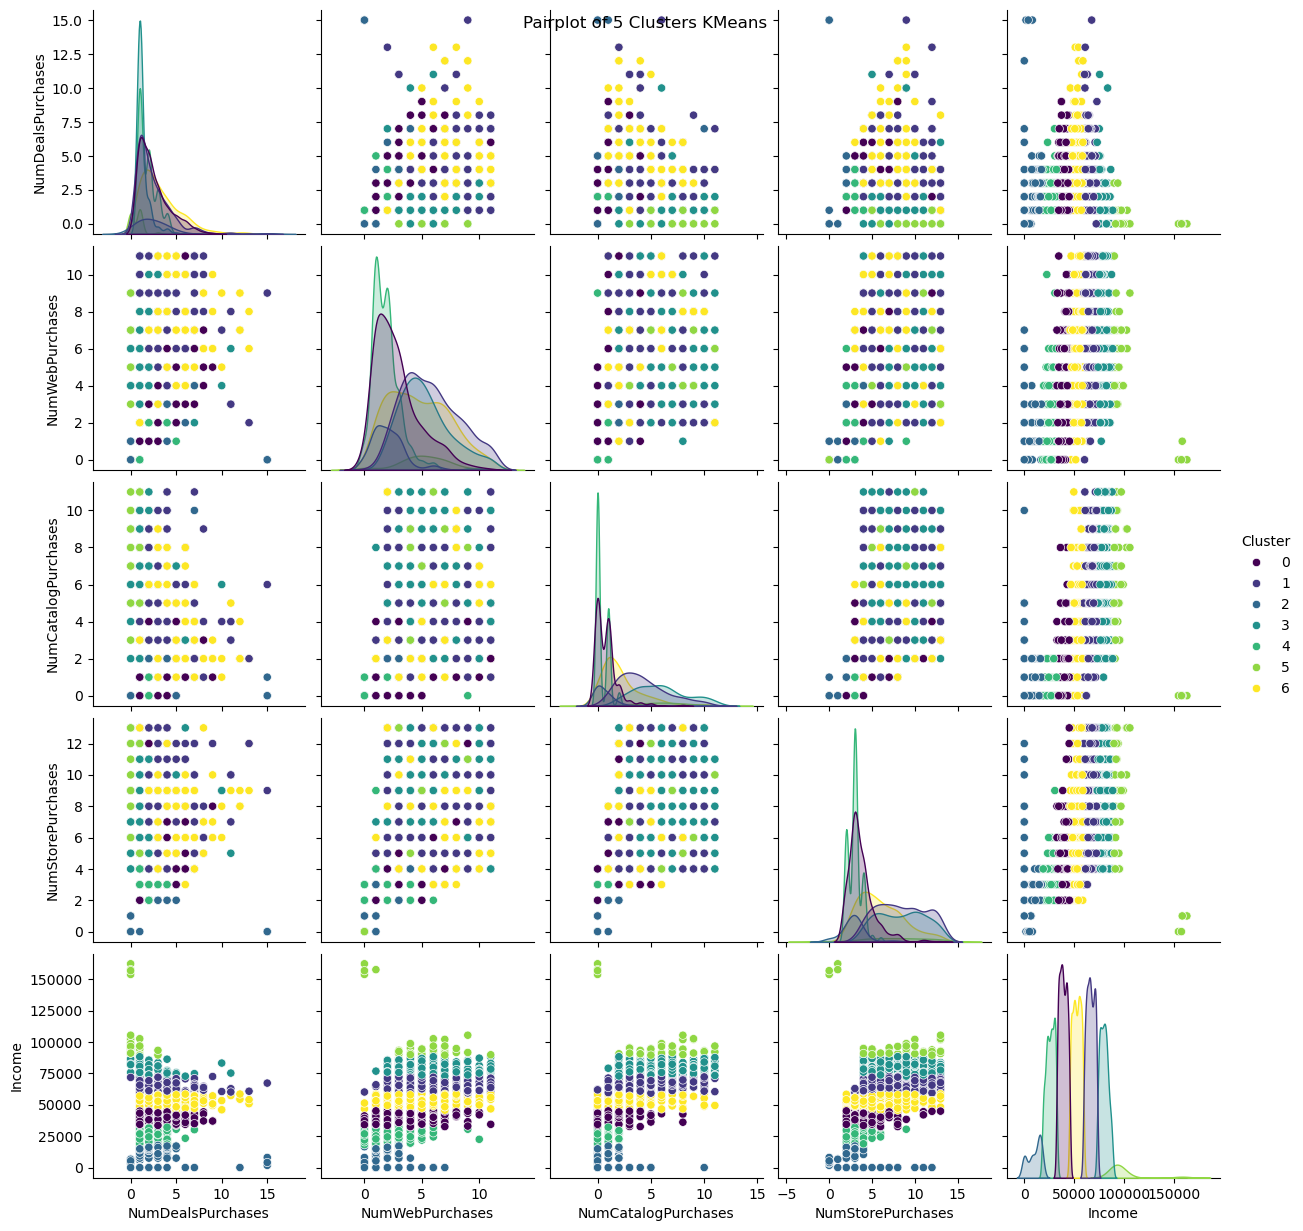

In [549]:
pairplot_clusters(X_clean, kmeans_labels_6, ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'Income'], 'Pairplot of 5 Clusters KMeans')    

Text(0.5, 1.0, 'Elbow Method')

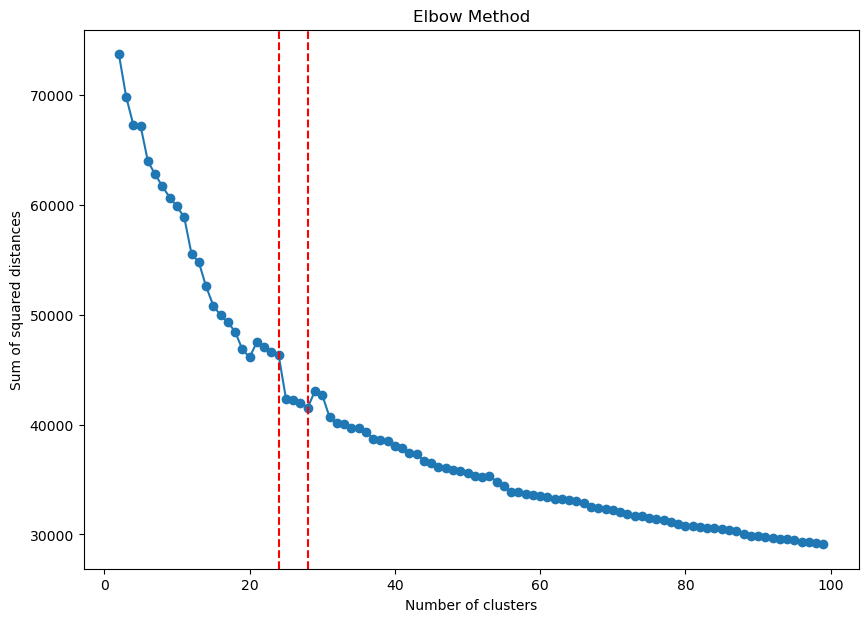

In [550]:
K_point = range(2, 100)
SSD = []

for k in K_point:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    SSD.append(kmeans.inertia_)
plt.figure(figsize=(10, 7))
plt.plot(K_point, SSD, marker='o')
plt.axvline(x=28, color='red', linestyle='--')
plt.axvline(x=24, color='red', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')    

In [551]:
kmeans_labels_24, metric_24 = k_mean_clustering(X_scaled, 28, '28 clusters standard')
df_metrics = pd.concat([df_metrics, metric_24], ignore_index=True)

kmeans_labels_11, metric_11 = k_mean_clustering(X_scaled, 24, '24 clusters standard')
df_metrics = pd.concat([df_metrics, metric_11], ignore_index=True)




Silhouette score for 28 clusters: 0.0952
Silhouette score for 24 clusters: 0.0798


# Висновки 8

- На вихідних даних за методом Ліктя отримали 5 кластерів, що трохи підвищило метрику силуєте. В деяких випадках візуалізація покращилося та стали більш виражені розділення на кластери
- При тому на масштабованих даних результати стали гірші


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [564]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

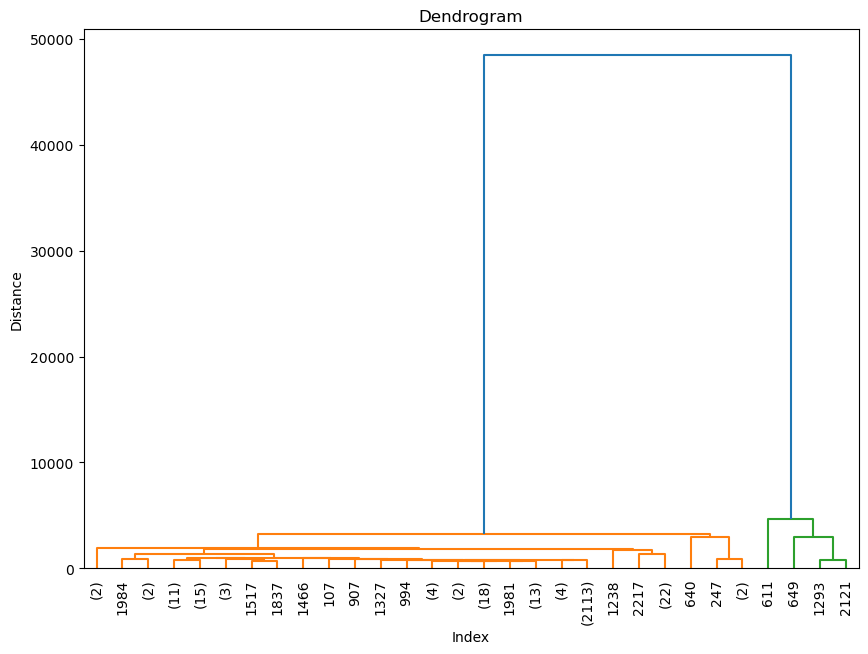

In [570]:
single_link = linkage(X_clean, method='single')

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dendrogram(single_link, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [571]:
labels_hier_2 = fcluster(single_link, t=2, criterion='maxclust')
metric_hier_2 = silhouette_score(X_clean, labels_hier_2)
print(f'Silhouette score for 2 clusters: {metric_hier_2:.3f}')

new_row = pd.DataFrame([{'model': 'hierarchical_2', 'value': metric_hier_2}])
df_metrics = pd.concat([df_metrics, new_row], ignore_index=True)

labels_hier_3 = fcluster(single_link, t=3, criterion='maxclust')
metric_hier_3 = silhouette_score(X_clean, labels_hier_3)
print(f'Silhouette score for 3 clusters: {metric_hier_3:.3f}')

new_row = pd.DataFrame([{'model': 'hierarchical_3', 'value': metric_hier_3}])
df_metrics = pd.concat([df_metrics, new_row], ignore_index=True)

Silhouette score for 2 clusters: 0.760
Silhouette score for 3 clusters: 0.755


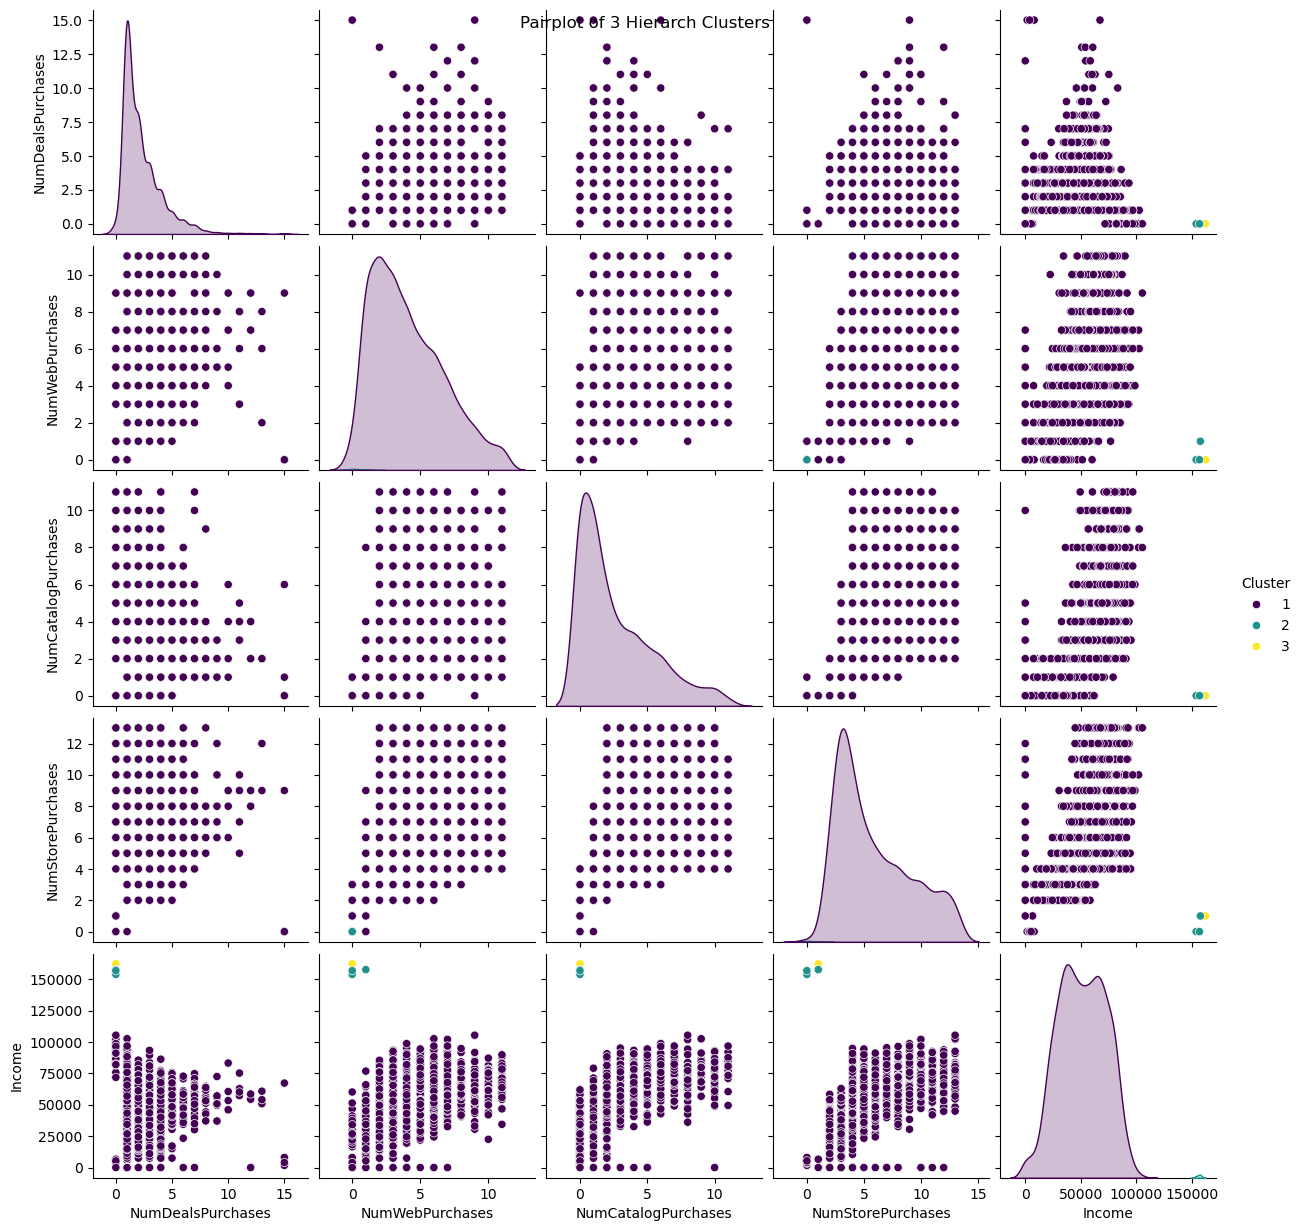

In [573]:
pairplot_clusters(X_clean, labels_hier_3, ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'Income'], 'Pairplot of 3 Hierarch Clusters')    

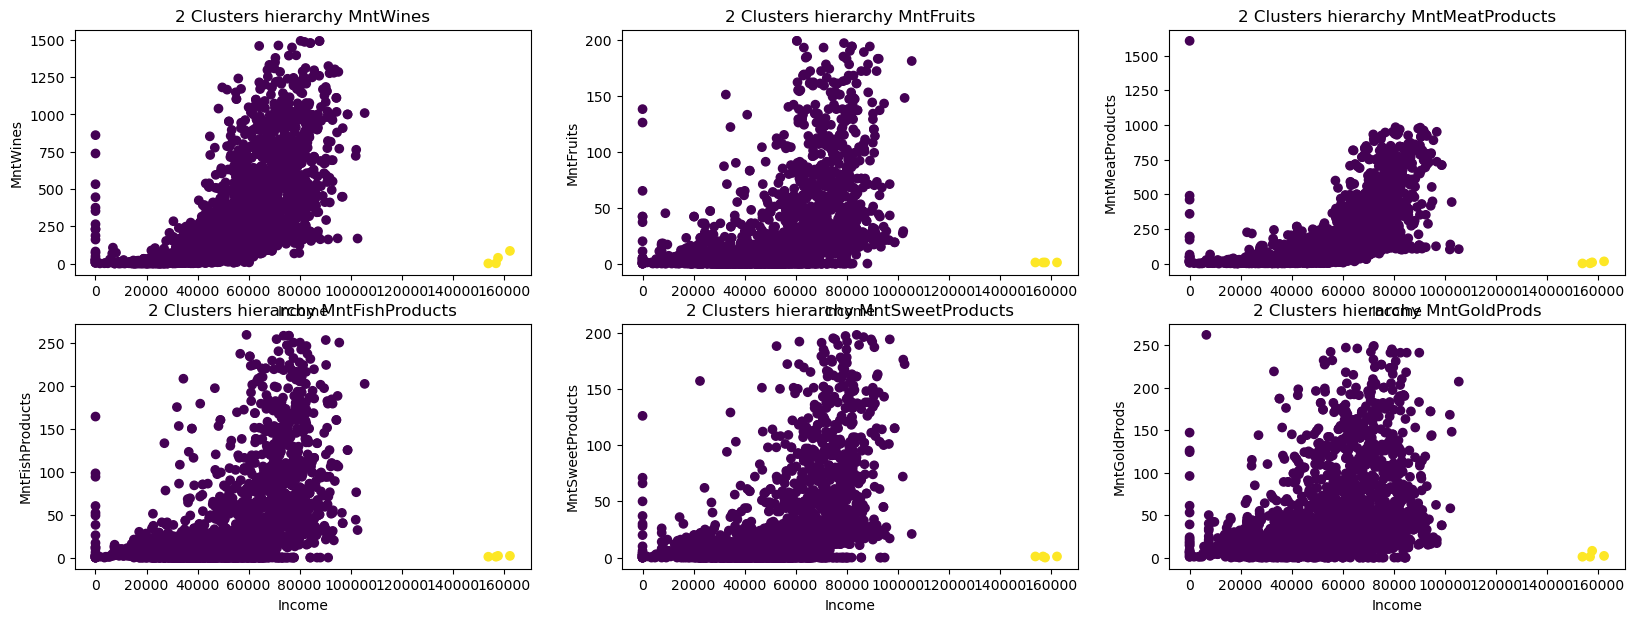

In [572]:
plt.figure(figsize=(20, 7))
col =['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

for i in col:
    plt.subplot(2, 3, col.index(i)+1)
    plt.scatter(X_clean['Income'], X_clean[i], c=labels_hier_2, cmap='viridis')
    plt.title(f'2 Clusters hierarchy {i}')
    plt.xlabel('Income')
    plt.ylabel(i)

 

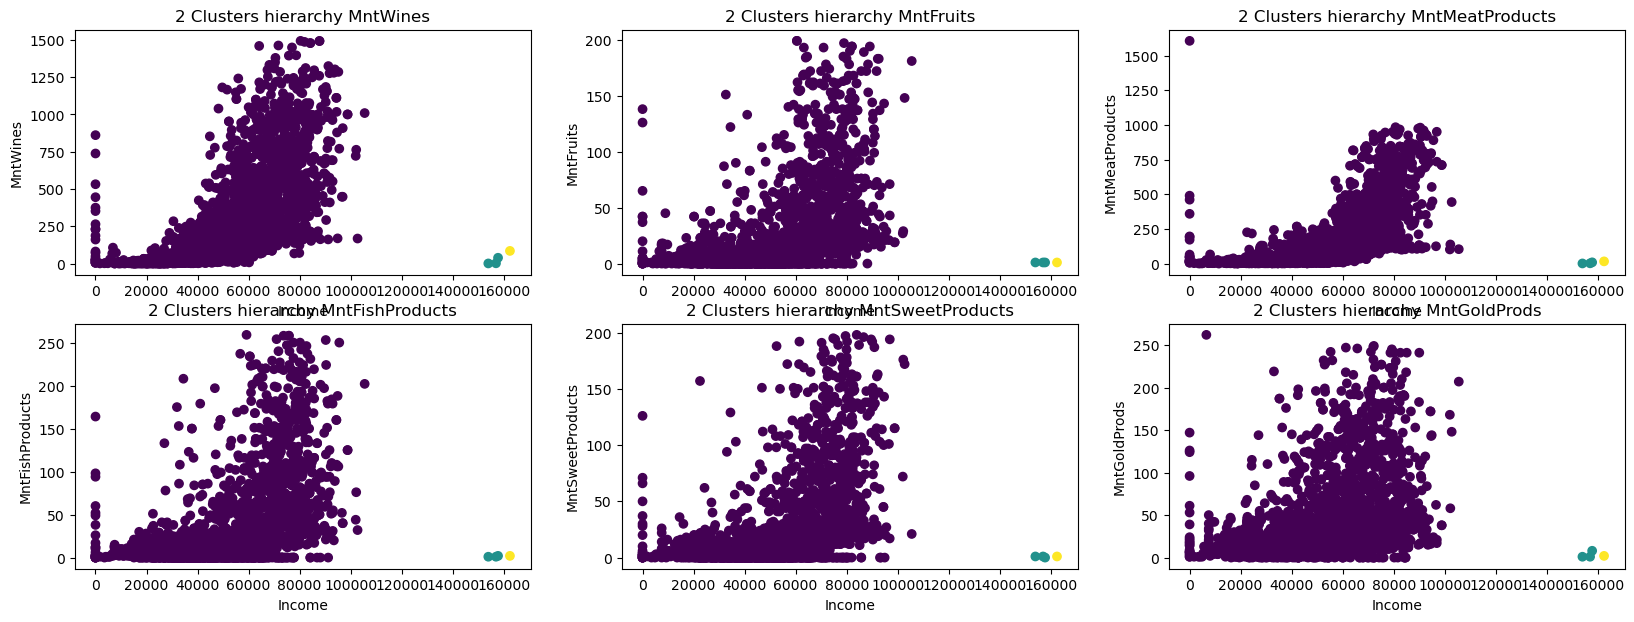

In [558]:
plt.figure(figsize=(20, 7))
col =['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

for i in col:
    plt.subplot(2, 3, col.index(i)+1)
    plt.scatter(X_clean['Income'], X_clean[i], c=labels_hier_3, cmap='viridis')
    plt.title(f'2 Clusters hierarchy {i}')
    plt.xlabel('Income')
    plt.ylabel(i)

In [559]:
df_metrics.sort_values(by='value', ascending=True, inplace=True)
df_metrics

,model,value
5,24 clusters standard,0.079826
4,28 clusters standard,0.095239
1,StandartScaler,0.097405
2,MinMaxScaler,0.170471
3,7 clusters,0.524035
0,3 clusters,0.528192
7,hierarchical_3,0.755474
6,hierarchical_2,0.760360


# Висновки 9
- Ми отримали неоднозначні результати. 
- Метрика силуєта показує гарні високі результати, але при тому можна виділити лише клас викидів. Схоже що в даних залишилося якісь викиди та необхідно ретельніше переглянути кожну колонку ще раз (Додаткова очистка колонки Income до 160к які зараз сформовані в окремий клас, не призвела до сильного покращеня кластеризації)
- В цілому метод показав погані результати

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [577]:
X_clean.shape

(2228, 40)

In [583]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=3).fit(X_clean)
labels_dbscan = dbscan.labels_

print("Unique labels found:", set(labels_dbscan))
print("Points marked as noise:", sum(labels_dbscan == -1))


mask = labels_dbscan != -1
X_filtered = X_clean[mask]
labels_filtered = labels_dbscan[mask]

score = silhouette_score(X_filtered, labels_filtered)
print(f'Silhouette score for DBSCAN (excluding noise): {score:.3f}')

Unique labels found: {0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
Points marked as noise: 2200
Silhouette score for DBSCAN (excluding noise): 1.000


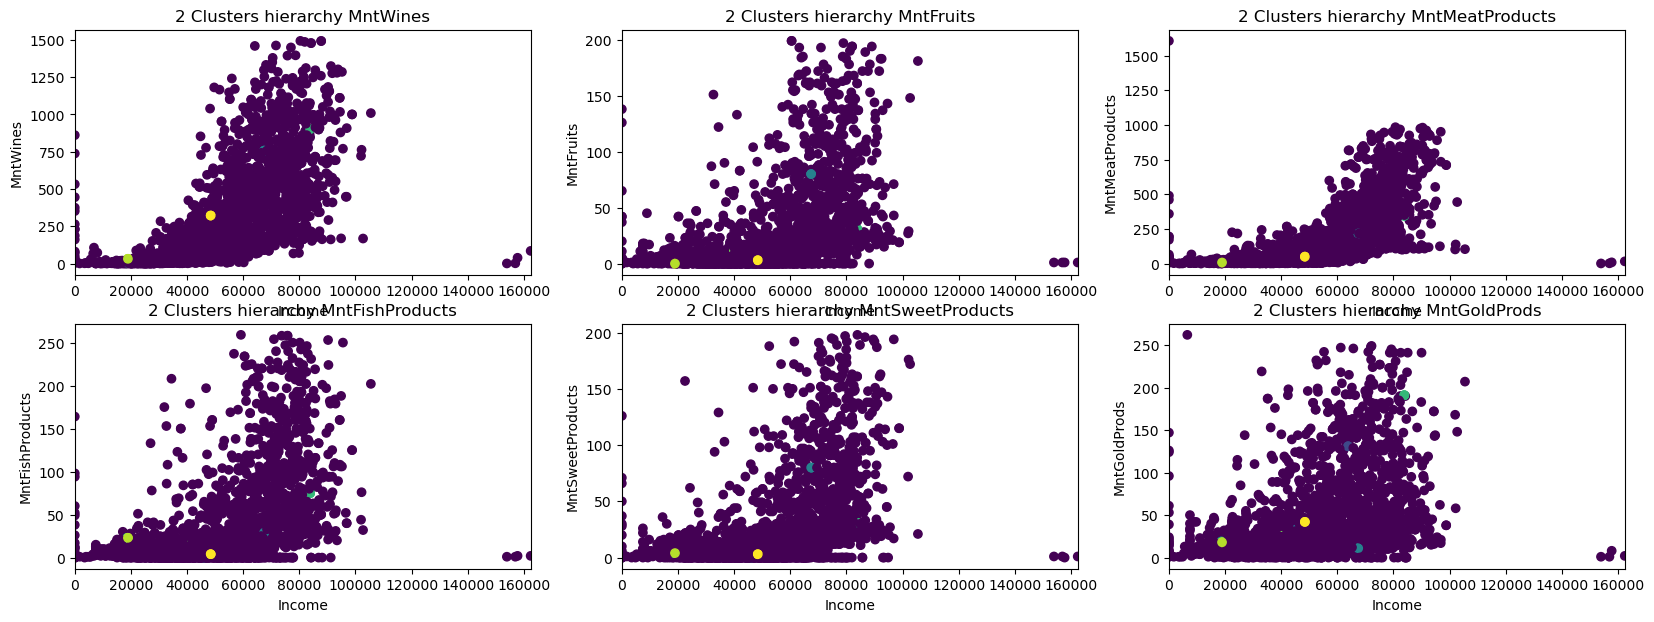

In [584]:
plt.figure(figsize=(20, 7))
col =['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

for i in col:
    plt.subplot(2, 3, col.index(i)+1)
    plt.scatter(X_clean['Income'], X_clean[i], c=labels_dbscan, cmap='viridis')
    plt.title(f'2 Clusters hierarchy {i}')
    plt.xlabel('Income')
    plt.xlim(0, 162397)
    plt.ylabel(i)

# Висновки 10

- Основвна проблема алгоритма що при підвищенні min_samples більше ніж 3, алгоритм перестає працювали. А бо формується тільки 1 кластер (Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)), А при понижені значення - кожен клієнт розбивається на окремий кластер, що немає сенсу.
- Всього записів 2228, при тому що алгоритм маркує 2200 з них як шум. Можливо в нас недостатньо даних аби застосовувати подібний алгоритм 

In [562]:
df_metrics.sort_values(by='value', ascending=True, inplace=True)
df_metrics

,model,value
5,24 clusters standard,0.079826
4,28 clusters standard,0.095239
1,StandartScaler,0.097405
2,MinMaxScaler,0.170471
3,7 clusters,0.524035
0,3 clusters,0.528192
7,hierarchical_3,0.755474
6,hierarchical_2,0.760360


Для найкращого алгоритму К-mean з 3 кластерами спробуємо візуалізувати його через пониження розмірності аби звести все в дворозмірний простір. Аби переконатися що наші кластери мають сенс та вони дійсно можуть зібратися в логічні хмари точок

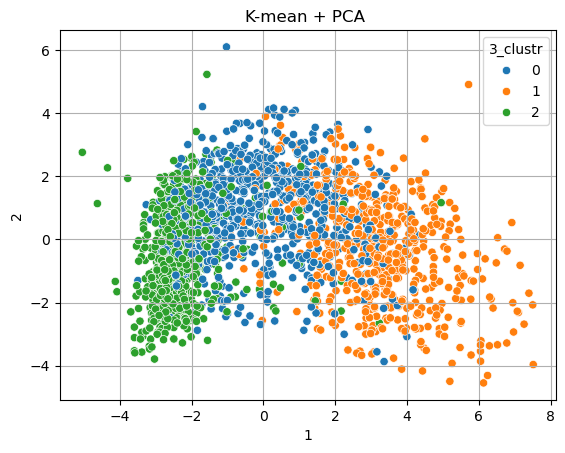

In [589]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42, )
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled, )

df_dim = pd.DataFrame(X_pca, columns=["1", "2"])
df_dim["3_clustr"] = kmeans_labels_3.astype(str)

sns.scatterplot(data=df_dim, x="1", y="2", hue="3_clustr")
plt.title("K-mean + PCA ")
plt.grid(True)
plt.show()